# Data Science in Finance mit Python - Final Case

### Michael Betz und Dennis Götz

**Aufgabenstellung für Bachelor- und Master-Studenten:**
1. Wählen Sie 15 Unternehmen aus, die bereits seit 1997 an der Börse gelistet sind. Bestimmen Sie für Ihre 15 Aktien die Portfolios mit der minimalen Varianz, dem minimalen VaR und der maximalen Sharpe Ratio. Nutzen Sie dafür Tagesdaten Ihrer 15 Aktien von 1997-2001.
2. Implementieren Sie Buy-and-Hold Strategien für Ihre drei Portfolios von 2002-2021 
auf Grundlage der errechneten Gewichte Ihrer 15 Aktien.
3. Diskutieren Sie die Performance Ihrer drei Portfolios.
4. Erstellen Sie eine Grafik für den Zeitraum 2002-2021, welche den Kursverlauf Ihrer 
drei Portfoliostrategien einem gleichgewichteten Portfolio aus den 15 Aktien als 
Benchmark gegenüberstellt.
5. Berechnen Sie die Portfolios mit der minimalen Varianz, dem minimalen VaR und der 
maximalen Sharpe Ratio nun für den Zeitraum von 2017-2021 und vergleichen Sie die 
Portfoliogewichte mit den Ihren.
6. Wie würden Sie die Implementierung Ihrer Portfoliostrategie noch verbessern? Was 
könnten Sie noch beachten?


Matrikelnummer: 272038

Name Teampartner: Betz Michael

In [1]:
# Import der notwendigen Bibliotheken
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import scipy.optimize as sco
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import yfinance as yf

# 1. Portfolios mit min. Varianz, min. VaR und max. Sharpe Ratio (1997-2001)

Aufgabenstellung: Wählen Sie 15 Unternehmen aus, die bereits seit 1997 an der Börse gelistet sind. Bestimmen Sie für Ihre 15 Aktien die Portfolios mit der **minimalen Varianz**, dem **minimalen VaR** und der **maximalen Sharpe Ratio**. Nutzen Sie dafür Tagesdaten Ihrer 15 Aktien von 1997-2001.

In [2]:
# Preise der 15 Aktien von 1997/01/01 - 2021/12/31 laden
yf.pdr_override()
tickers = sorted(['AIR', 'DTE', 'FDX', 'NKE', 'SAP', 'SONY', 'VOD', 'WM', 'ORCL', 'MSFT', 'INTC', 'PCRFY', 'COST', 'VZ', 'MO'])
start = '1997-01-01'
end = '2021-12-31'

Adj_Close = web.get_data_yahoo(tickers, start, end)['Adj Close']
Adj_Close = pd.DataFrame(Adj_Close)
Adj_Close.isna().sum()

[*********************100%***********************]  15 of 15 completed


AIR      0
COST     0
DTE      0
FDX      0
INTC     0
MO       0
MSFT     0
NKE      0
ORCL     0
PCRFY    0
SAP      0
SONY     0
VOD      0
VZ       0
WM       0
dtype: int64

In [3]:
# Berechnung der Logrenditen (Vorteil der Additivität)
returns = pd.DataFrame(np.diff(np.log(Adj_Close).T).T)
returns.index = Adj_Close.index[1:]
returns.columns = tickers
returns

# Alternativ
#returns = pd.DataFrame(np.diff(np.log(Adj_Close.values).T).T)
#returns = np.log(Adj_Close/Adj_Close.shift(1))
#returns = np.log1p(Adj_Close.pct_change())

,AIR,COST,DTE,FDX,INTC,MO,MSFT,NKE,ORCL,PCRFY,SAP,SONY,VOD,VZ,WM
Date,,,,,,,,,,,,,,,
1997-01-03,-0.008584,-0.010310,-0.003854,0.019859,0.059553,0.013363,0.036094,0.014569,0.060624,0.016833,-0.010929,-0.001918,0.024541,-0.003738,-0.024591
1997-01-06,-0.008658,0.023049,-0.015564,-0.019859,0.003607,0.002210,-0.002958,0.004123,0.005586,0.006052,0.002744,0.013346,0.018018,-0.003752,-0.012526
1997-01-07,0.000000,0.022528,0.011696,-0.002870,0.031889,-0.001105,0.007380,-0.014508,-0.002789,0.000000,0.000000,0.011299,0.000000,-0.017062,0.049190
1997-01-08,-0.004357,0.009853,-0.007781,-0.020320,-0.007877,-0.003320,-0.019303,-0.006283,-0.031208,-0.012140,0.013605,-0.007519,0.002972,-0.016059,0.027615
1997-01-09,0.004357,0.043172,-0.007844,0.028904,0.005258,0.005528,-0.012067,0.018731,-0.038184,-0.026297,0.031918,-0.019048,0.008863,0.005876,-0.015687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.011757,0.001273,0.001028,0.015324,0.006648,-0.003847,0.004462,0.001389,-0.001559,0.008246,0.004866,0.006155,0.003291,-0.001707,0.007936
2021-12-27,0.005181,0.023523,0.008778,0.009528,0.012203,0.001925,0.022921,0.011463,-0.002008,-0.009166,0.008601,0.026687,-0.003950,0.000000,0.011359
2021-12-28,0.007466,0.002074,0.007439,0.000741,-0.003472,0.012531,-0.003510,-0.006946,-0.009989,0.008253,0.001556,0.002120,0.006575,0.000759,0.008209


Datensätze Adj Close und returns plotten; Verlauf der Assets über die Zeitreihe beobachten/beschreiben...

In [4]:
# DataFrame auf den Zeitraum des Kalibrationsdatensatzes von 1997/01/01 - 2001/12/31 begrenzen
insample = returns.loc['1997-01-01':'2001-12-31']
insample

,AIR,COST,DTE,FDX,INTC,MO,MSFT,NKE,ORCL,PCRFY,SAP,SONY,VOD,VZ,WM
Date,,,,,,,,,,,,,,,
1997-01-03,-0.008584,-0.010310,-0.003854,0.019859,0.059553,0.013363,0.036094,0.014569,0.060624,0.016833,-0.010929,-0.001918,0.024541,-0.003738,-0.024591
1997-01-06,-0.008658,0.023049,-0.015564,-0.019859,0.003607,0.002210,-0.002958,0.004123,0.005586,0.006052,0.002744,0.013346,0.018018,-0.003752,-0.012526
1997-01-07,0.000000,0.022528,0.011696,-0.002870,0.031889,-0.001105,0.007380,-0.014508,-0.002789,0.000000,0.000000,0.011299,0.000000,-0.017062,0.049190
1997-01-08,-0.004357,0.009853,-0.007781,-0.020320,-0.007877,-0.003320,-0.019303,-0.006283,-0.031208,-0.012140,0.013605,-0.007519,0.002972,-0.016059,0.027615
1997-01-09,0.004357,0.043172,-0.007844,0.028904,0.005258,0.005528,-0.012067,0.018731,-0.038184,-0.026297,0.031918,-0.019048,0.008863,0.005876,-0.015687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001-12-24,0.000000,0.010722,0.005335,0.000965,-0.012106,0.012369,-0.004006,0.013234,-0.002786,0.001681,-0.014797,0.000000,0.006279,0.001060,-0.003179
2001-12-26,-0.011050,-0.001362,0.001450,0.025125,0.008396,0.003014,0.006076,0.000876,-0.017588,0.048350,0.003483,-0.005651,0.020140,0.000000,0.009824
2001-12-27,0.031714,0.003176,0.012956,-0.000752,0.011700,0.001504,0.002509,-0.006148,-0.007122,-0.006421,0.012875,-0.002497,-0.004227,0.025313,0.015024


Berechnung der notwendigen Eingabeparameter für die anschließenden Funktionen

In [5]:
# Berechnung der Varianz-Covarianz-Matrix, mittleren Renditen und Festlegung von Alpha-Quantil, Zeithorizont und risikolosem Zins
insample_cov = insample.cov() #plot
insample_mean_returns = insample.mean()
alpha = 0.05
days = 252
rf = 0 #erklären

In [6]:
#insample_cov #plot
#insample_covariance = insample_cov
#for i in range(len(insample_covariance)):
#    insample_covariance.iloc[i,i] = 0
#np.sum(np.sum(insample_covariance))

**1.1 Bestimmung des Portfolios mit minimaler Varianz**

Wir entscheiden uns für die **Numerische Optimierung**, da diese genauer ist als die Monte-Carlo-Simulation, welche sich nur an das Miniumum/Maximum annähert.

**Funktion 1** berechnet die annualisierte Standardabweichung $𝜎=h^{T}Vh$ des Portfolios und übergibt diese an die Minimierungsfunktion in **Funktion 2**.

Die **Nebenbedingung** stellt sicher, dass die Summe der Gewichte im Portfolio gleich 1 ist.

In [7]:
# Funktion 1
def calc_portfolio_std(weights, cov):
    portfolio_std = np.sqrt(np.dot(np.dot(weights.T, cov), weights)) * np.sqrt(252) #h=15x1 Matrix-> [h.transpose * cov] * h = [1x15 * 15x15] * 15x1 = 1x15 * 15x1 = 1x1
    return portfolio_std

# Funktion 2
def min_variance(cov):
    num_assets = len(cov)
    args = cov
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) #Nebenbedingung; ; eq für equality -> Gleichung != 0; np.sum(weights) - 1 = 0 (Summe der Gewichte müssen 1 ergeben und Gleichung muss gleich Null sein!)
    bound = (0.0, 1.0)
    bounds = tuple(bound for assets in range(num_assets))
    result = sco.minimize(calc_portfolio_std, num_assets*[1/num_assets], args=args, 
                         method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# Ausführen der Funktionen
function_result = min_variance(insample_cov) #fun: gibt den ZF-wert (Min Varinaz) an & x: gibt die Gewichtungen der einzelnen Aktien im Portfolio an
function_result

     fun: 0.15456016242262624
     jac: array([0.15419072, 0.15467958, 0.15447694, 0.1546565 , 0.18305005,
       0.15474121, 0.15462639, 0.15479259, 0.19125123, 0.15501154,
       0.17939277, 0.15390375, 0.15441626, 0.15413177, 0.1548376 ])
 message: 'Optimization terminated successfully'
    nfev: 113
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([5.68635306e-02, 9.58629684e-03, 3.93459297e-01, 4.71814863e-02,
       0.00000000e+00, 7.11133523e-02, 3.55844757e-02, 5.79170152e-02,
       0.00000000e+00, 1.35474366e-01, 1.11943874e-17, 2.19223040e-02,
       2.75629613e-02, 9.03245568e-02, 5.30103576e-02])

In [8]:
# Ergebnisse der Optimierung in DataFrame abspeichern
insample_min_port_variance = pd.DataFrame([round(x,2) for x in function_result['x']], index=tickers).T #Gewichte auf 2 Nachkommastellen runden
insample_min_port_variance['Function Result'] = function_result['fun'] #Spalte für Zielfunktionswert
insample_min_port_variance

,AIR,COST,DTE,FDX,INTC,MO,MSFT,NKE,ORCL,PCRFY,SAP,SONY,VOD,VZ,WM,Function Result
0,0.06,0.01,0.39,0.05,0.0,0.07,0.04,0.06,0.0,0.14,0.0,0.02,0.03,0.09,0.05,0.15456


**1.2 Bestimmung des Portfolios mit minimalem Value at Risk (VaR)**

**Funktion 1** berechnet die annualisierten Mean Returns 𝜇, die annualisierte Standardabweichung $𝜎=h^{T}Vh$ und den Value at Risk des Portfolios und gibt den VaR aus, damit dieser von der Minimierungsfunktion in **Funktion 2** minimiert werden kann.

In [9]:
# Funktion 1
def calc_portfolio_VaR(weights, mean_returns, cov, alpha, days):
    portfolio_return = np.sum(weights * mean_returns) * days #nur bei Logrenditen Addition möglich
    portfolio_std = np.sqrt(np.dot(np.dot(weights.T, cov), weights)) * np.sqrt(days)
    portfolio_VaR = abs(portfolio_return - (portfolio_std * stats.norm.ppf(1 - alpha))) #Erklären
    return portfolio_VaR

# Funktion 2
def min_VaR(mean_returns, cov, alpha, days):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, alpha ,days)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0, 1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_portfolio_VaR, num_assets*[1/num_assets], args=args, 
                         method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# Ausführen der Funktionen
function_result = min_VaR(insample_mean_returns, insample_cov, alpha, days)
#function_result

In [10]:
# Ergebnisse der Optimierung in DataFrame abspeichern
insample_min_port_VaR = pd.DataFrame([round(x,2) for x in function_result['x']], index=tickers).T
insample_min_port_VaR['Function Result'] = function_result['fun']
insample_min_port_VaR

,AIR,COST,DTE,FDX,INTC,MO,MSFT,NKE,ORCL,PCRFY,SAP,SONY,VOD,VZ,WM,Function Result
0,0.0,0.09,0.44,0.09,0.0,0.07,0.12,0.0,0.0,0.0,0.01,0.01,0.1,0.08,0.0,0.138704


**1.3 Bestimmung des Portfolios mit maximaler Sharpe Ratio (𝜇 - 𝜎 effizientes Portfolio)**
 
 

**Funktion 1** berechnet die annualisierten Mean Returns 𝜇, die annualisierte Standardabweichung $𝜎=h^{T}Vh$ und die Sharpe Ratio (𝜇 - rf) / 𝜎 des Portfolios und gibt die negative Sharpe Ratio aus, damit diese von der Minimierungsfunktion in **Funktion 2** maximiert werden kann.

In [11]:
# Funktion 1
def calc_neg_sharpe(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(weights * mean_returns) * 252
    portfolio_std = np.sqrt(np.dot(np.dot(weights.T, cov), weights)) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return -sharpe_ratio

# Funktion 2
def max_sharpe_ratio(mean_returns, cov, rf):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, rf)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) -1})
    bound = (0.0, 1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_neg_sharpe, num_assets*[1/num_assets], args=args, 
                          method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# Ausführen der Funktionen
function_result = max_sharpe_ratio(insample_mean_returns, insample_cov, rf)
#function_result

In [12]:
# Ergebnisse der Optimierung in DataFrame abspeichern
insample_max_port_SharpeRatio = pd.DataFrame([round(x,2) for x in function_result['x']], index=tickers).T
insample_max_port_SharpeRatio['Function Result'] = -function_result['fun'] #hier Vorzeichen wieder umkehren!
insample_max_port_SharpeRatio

,AIR,COST,DTE,FDX,INTC,MO,MSFT,NKE,ORCL,PCRFY,SAP,SONY,VOD,VZ,WM,Function Result
0,0.0,0.15,0.38,0.1,0.0,0.03,0.16,0.0,0.0,0.0,0.01,0.0,0.14,0.03,0.0,0.894156


**1.4 Vergleich der Gewichtungen der drei Strategien**

In [13]:
# Zusammenfassung der Portfolios in einem DataFrame
insample_portfolios = pd.concat([insample_min_port_variance, insample_min_port_VaR, insample_max_port_SharpeRatio], axis=0)
insample_portfolios.index = ['Min Variance', 'Min VaR', 'Max Sharpe Ratio']
insample_portfolios

,AIR,COST,DTE,FDX,INTC,MO,MSFT,NKE,ORCL,PCRFY,SAP,SONY,VOD,VZ,WM,Function Result
Min Variance,0.06,0.01,0.39,0.05,0.0,0.07,0.04,0.06,0.0,0.14,0.00,0.02,0.03,0.09,0.05,0.154560
Min VaR,0.00,0.09,0.44,0.09,0.0,0.07,0.12,0.00,0.0,0.00,0.01,0.01,0.10,0.08,0.00,0.138704
Max Sharpe Ratio,0.00,0.15,0.38,0.10,0.0,0.03,0.16,0.00,0.0,0.00,0.01,0.00,0.14,0.03,0.00,0.894156


In [14]:
# Dataframe nur mit Gewichtungen der Aktien
insample_weights = insample_portfolios.drop(['Function Result'], axis=1)

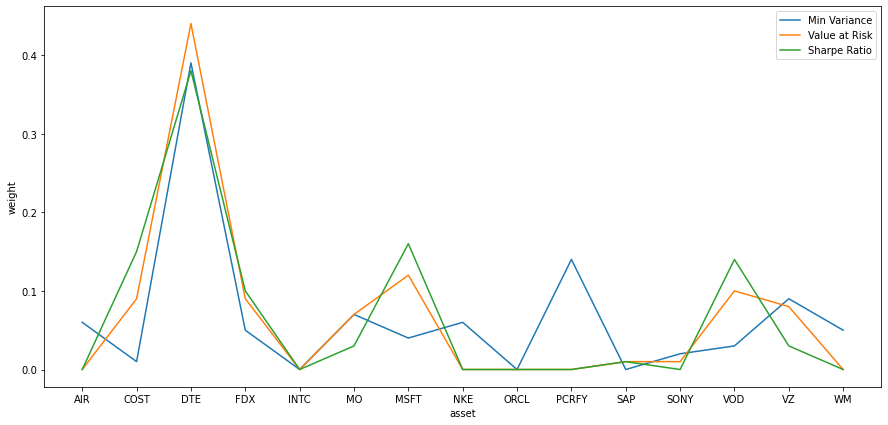

In [15]:
# 1997-2001
plt.figure(figsize=(15,7))
plt.plot(insample_weights.iloc[0].T, label='Min Variance')
plt.plot(insample_weights.iloc[1].T, label='Value at Risk')
plt.plot(insample_weights.iloc[2].T, label='Sharpe Ratio')
plt.xlabel('asset')
plt.ylabel('weight')
plt.legend();

Beschreibung der Gewichtungen; Unterschiede & Ähnlichkeiten; ZF-Werte...

Min VaR und Max Sharpe Ratio ähnliche Gewichtungen

# 2. Buy-and-Hold Strategien (2002-2021)

Aufgabenstellung: Implementieren Sie Buy-and-Hold Strategien für Ihre drei Portfolios von 2002-2021 
auf Grundlage der errechneten Gewichte Ihrer 15 Aktien. 

In [16]:
# DataFrame auf den Zeitraum des Testdatensatzes von 2002/01/01 - 2021/12/31 begrenzen
outsample = returns.loc['2002-01-01':'2021-12-31']
outsample

,AIR,COST,DTE,FDX,INTC,MO,MSFT,NKE,ORCL,PCRFY,SAP,SONY,VOD,VZ,WM
Date,,,,,,,,,,,,,,,
2002-01-02,0.020868,0.001577,0.010200,-0.019070,0.048109,0.017083,0.011854,0.012019,0.012234,0.007905,0.014921,0.018672,0.009688,0.021470,-0.023464
2002-01-03,0.048790,0.008735,-0.005443,0.026751,0.073588,-0.001072,0.032145,-0.007406,0.089571,0.017948,0.041106,0.027899,0.028888,0.032664,-0.018456
2002-01-04,0.018463,-0.001115,-0.008340,0.033850,0.007573,-0.010790,-0.004778,0.008811,0.010410,0.043140,0.040052,0.047933,-0.002626,0.010128,0.006839
2002-01-07,-0.014330,-0.015073,-0.007446,0.021765,-0.014636,0.010575,-0.004947,0.003328,0.002586,-0.003711,-0.030620,-0.005259,-0.031288,-0.006144,-0.000649
2002-01-08,0.015346,0.006777,-0.019230,-0.005079,0.008751,0.015127,0.011890,0.002794,0.016646,-0.018005,-0.025852,-0.030683,-0.013659,-0.002306,-0.000325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.011757,0.001273,0.001028,0.015324,0.006648,-0.003847,0.004462,0.001389,-0.001559,0.008246,0.004866,0.006155,0.003291,-0.001707,0.007936
2021-12-27,0.005181,0.023523,0.008778,0.009528,0.012203,0.001925,0.022921,0.011463,-0.002008,-0.009166,0.008601,0.026687,-0.003950,0.000000,0.011359
2021-12-28,0.007466,0.002074,0.007439,0.000741,-0.003472,0.012531,-0.003510,-0.006946,-0.009989,0.008253,0.001556,0.002120,0.006575,0.000759,0.008209


BaH-Strategie entwickeln...

In [17]:
# Kumulierte Summen berechnen
outsample_cumulated = outsample.cumsum() #Additivität

# Returns der Strategien berechnen
BaH_returns = pd.DataFrame(columns = ['Min Variance', 'Min VaR', 'Max Sharpe Ratio'], index=['Returns'])
BaH_returns.loc['Returns'] = [np.sum(outsample_cumulated.iloc[-1] * insample_weights.iloc[i]) for i in range(len(insample_weights))]
BaH_returns

,Min Variance,Min VaR,Max Sharpe Ratio
Returns,1.7405,1.98409,2.004041


In [18]:
# BaH-Strategie mit minimum Variance Portfolio
BaH_min_variance = insample_weights.iloc[0]*outsample_cumulated #Array mit Gewichtungen * kumuliertem Outsample Datensatz
BaH_min_variance['Return'] = np.sum(BaH_min_variance, axis=1)

# BaH-Strategie mit minimun VaR Portfolio
BaH_min_VaR = insample_weights.iloc[1]*outsample_cumulated
BaH_min_VaR['Return'] = np.sum(BaH_min_VaR, axis=1)

# BaH-Strategie mit maximum Sharpe Ratio Portfolio
BaH_max_SharpeRatio = insample_weights.iloc[2]*outsample_cumulated
BaH_max_SharpeRatio['Return'] = np.sum(BaH_max_SharpeRatio, axis=1)

In [19]:
#BaH_min_variance
#BaH_min_VaR
#BaH_max_SharpeRatio

# 3. Diskussion der Portfolio-Performances 

Aufgabenstellung: Diskutieren Sie die Performance Ihrer drei Portfolios.

In [20]:
# Renditen der Strategien am 2021/12/31
BaH = pd.concat(x.iloc[-1:] for x in [BaH_min_variance, BaH_min_VaR, BaH_max_SharpeRatio])
BaH.index = ['Min Variance', 'Min VaR', 'Max Sharpe Ratio']
BaH #für jedes Portfolio Var, VaR, Sharpe Ratio

,AIR,COST,DTE,FDX,INTC,MO,MSFT,NKE,ORCL,PCRFY,SAP,SONY,VOD,VZ,WM,Return
Min Variance,0.093778,0.028977,0.801589,0.087166,0.0,0.181124,0.111464,0.203519,0.0,-0.00695,0.000000,0.021282,0.008383,0.101746,0.108421,1.740500
Min VaR,0.000000,0.260796,0.904357,0.156899,0.0,0.181124,0.334391,0.000000,0.0,-0.00000,0.017497,0.010641,0.027944,0.090441,0.000000,1.984090
Max Sharpe Ratio,0.000000,0.434659,0.781035,0.174332,0.0,0.077625,0.445855,0.000000,0.0,-0.00000,0.017497,0.000000,0.039122,0.033915,0.000000,2.004041


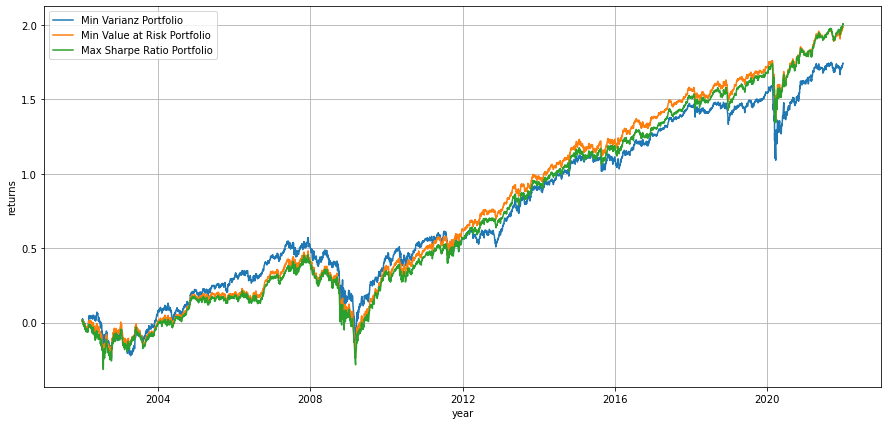

In [21]:
# Plot
plt.figure(figsize=(15,7))
plt.plot(BaH_min_variance['Return'], label = 'Min Varianz Portfolio')
plt.plot(BaH_min_VaR['Return'], label = 'Min Value at Risk Portfolio')
plt.plot(BaH_max_SharpeRatio['Return'], label = 'Max Sharpe Ratio Portfolio')
plt.xlabel('year')
plt.ylabel('returns')
plt.grid()
plt.legend();

**Diskussion:**
- Beste Strategie
- langfrisitger Trend
- Finanzkrise 2008 und Corona Krise 2020 erkennbar
- welche Strategie am besten in Krisen?
- Vergleich zur Benchmark

- Min Variance in Krisenzeiten stärker (Risikominimierung!), aber in den Wachstumsphasen Min VaR und Max Sharpe Ratio besser

# 4. Vergleich der Strategien mit einem gleichgewichteten Portfolio und Grafische Darstellung der Strategien (2002-2021)

Aufgabenstellung: Erstellen Sie eine Grafik für den Zeitraum 2002-2021, welche den Kursverlauf Ihrer 
drei Portfoliostrategien einem gleichgewichteten Portfolio aus den 15 Aktien als 
Benchmark gegenüberstellt.

In [22]:
# Erstellen der BaH-Strategie mit einem gleichgewichteten Portfolio
BaH_eq_weights = (1/len(tickers)) * outsample_cumulated
BaH_eq_weights['Return'] = np.sum(BaH_eq_weights, axis=1)

# Return des gleichgewichteten Portfolios
BaH_eq_weights.iloc[-1,-1] #Wert in letzter Zeile und letzter Spalte

1.7580618437963156

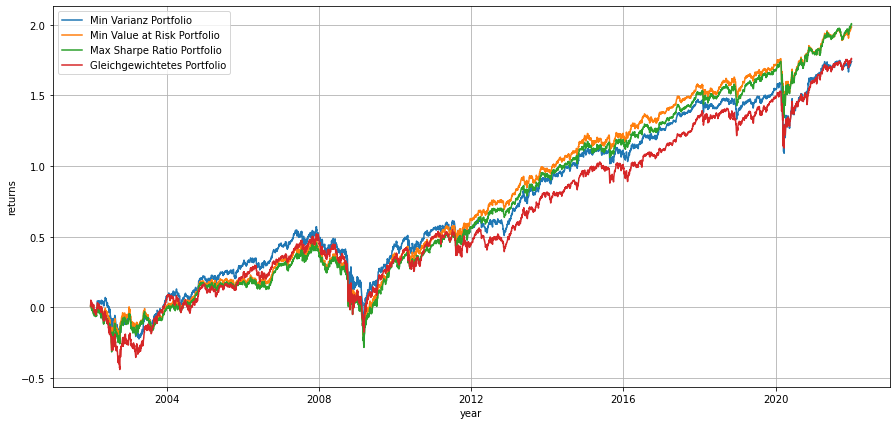

In [23]:
plt.figure(figsize=(15,7))
plt.plot(BaH_min_variance['Return'], label = 'Min Varianz Portfolio')
plt.plot(BaH_min_VaR['Return'], label = 'Min Value at Risk Portfolio')
plt.plot(BaH_max_SharpeRatio['Return'], label = 'Max Sharpe Ratio Portfolio')
plt.plot(BaH_eq_weights['Return'], label = 'Gleichgewichtetes Portfolio')
plt.xlabel('year')
plt.ylabel('returns')
plt.grid()
plt.legend();

**Diskussion:**
- Strategien oder Benchmark besser?
- langfrisitger Trend
- Finanzkrise 2008 und Corona Krise 2020

# 5. Portfolios mit min. Varianz, min. VaR und max. Sharpe Ratio (2017-2021)

Aufgabenstellung: Berechnen Sie die Portfolios mit der minimalen Varianz, dem minimalen VaR und der 
maximalen Sharpe Ratio nun für den Zeitraum von 2017-2021 und vergleichen Sie die 
Portfoliogewichte mit den Ihren.

In [24]:
# Testdatensatz auf den gekürzten Zeitraum von 2017/01/01 - 2021/12/31 begrenzen
outsample_shorted = outsample.loc['2017-01-01':'2021-12-31']
#outsample_shorted

In [25]:
# Berechnung der Varianz-Covarianz-Matrix und mitteleren Renditen; alpha-Quantil, Zeithorizont und risikoloser Zins wie vorher (siehe 1.2 & 1.3)
outsample_shorted_cov = outsample_shorted.cov()
outsample_shorted_mean_returns = outsample_shorted.mean()

**5.1 Bestimmung des Portfolios mit minimaler Varianz**

In [26]:
# Ausführen der Funktionen aus Kapitel 1.1
function_result = min_variance(outsample_shorted_cov)
#function_result

In [27]:
# Ergebnisse der Optimierung in DataFrame abspeichern
outsample_shorted_min_port_variance = pd.DataFrame([round(x,2) for x in function_result['x']], index=tickers).T
outsample_shorted_min_port_variance['Function Result'] = function_result['fun']
outsample_shorted_min_port_variance

,AIR,COST,DTE,FDX,INTC,MO,MSFT,NKE,ORCL,PCRFY,SAP,SONY,VOD,VZ,WM,Function Result
0,0.0,0.2,0.03,0.0,0.0,0.07,0.0,0.0,0.0,0.07,0.05,0.08,0.0,0.38,0.12,0.152739


**5.2 Bestimmung des Portfolios mit minimalem Value at Risk (VaR)**

In [28]:
# Ausführen der Funktionen aus Kapitel 1.2
function_result = min_VaR(outsample_shorted_mean_returns, outsample_shorted_cov, alpha, days)
#function_result

In [29]:
# Ergebnisse der Optimierung in DataFrame abspeichern
outsample_shorted_min_port_VaR = pd.DataFrame([round(x,2) for x in function_result['x']], index=tickers).T
outsample_shorted_min_port_VaR['Function Result'] = function_result['fun']
outsample_shorted_min_port_VaR

,AIR,COST,DTE,FDX,INTC,MO,MSFT,NKE,ORCL,PCRFY,SAP,SONY,VOD,VZ,WM,Function Result
0,0.0,0.43,0.0,0.0,0.0,0.0,0.23,0.03,0.0,0.0,0.0,0.2,0.0,0.0,0.11,0.02504


**5.3 Bestimmung des Portfolios mit maximaler Sharpe Ratio (𝜇 - 𝜎 effizientes Portfolio)**

In [30]:
# Ausführen der Funktionen aus Kapitel 1.3
function_result = max_sharpe_ratio(outsample_shorted_mean_returns, outsample_shorted_cov, rf)
#function_result

In [31]:
# Ergebnisse der Optimierung in DataFrame abspeichern
outsample_shorted_max_port_SharpeRatio = pd.DataFrame([round(x,2) for x in function_result['x']], index=tickers).T
outsample_shorted_max_port_SharpeRatio['Function Result'] = -function_result['fun']
outsample_shorted_max_port_SharpeRatio

,AIR,COST,DTE,FDX,INTC,MO,MSFT,NKE,ORCL,PCRFY,SAP,SONY,VOD,VZ,WM,Function Result
0,0.0,0.43,0.0,0.0,0.0,0.0,0.26,0.03,0.0,0.0,0.0,0.2,0.0,0.0,0.08,1.514471


**5.4 Vergleich der Gewichtungen der drei Strategien von 1997-2001 und 2017-2021**

In [32]:
# Zusammenfassung der Portfolios in einem DataFrame
outsample_portfolios = pd.concat([outsample_shorted_min_port_variance, outsample_shorted_min_port_VaR, outsample_shorted_max_port_SharpeRatio], axis=0)
outsample_portfolios.index = ['Min Variance', 'Min VaR', 'Max Sharpe Ratio']

# Gegenüberstellung der Gewichtungen (nachher - vorher)
outsample_portfolios - insample_portfolios

,AIR,COST,DTE,FDX,INTC,MO,MSFT,NKE,ORCL,PCRFY,SAP,SONY,VOD,VZ,WM,Function Result
Min Variance,-0.06,0.19,-0.36,-0.05,0.0,0.00,-0.04,-0.06,0.0,-0.07,0.05,0.06,-0.03,0.29,0.07,-0.001821
Min VaR,0.00,0.34,-0.44,-0.09,0.0,-0.07,0.11,0.03,0.0,0.00,-0.01,0.19,-0.10,-0.08,0.11,-0.113664
Max Sharpe Ratio,0.00,0.28,-0.38,-0.10,0.0,-0.03,0.10,0.03,0.0,0.00,-0.01,0.20,-0.14,-0.03,0.08,0.620315


Veränderungen in den Funktionsergebnissen: ...

In [33]:
# Dataframe nur mit Gewichtungen der Aktien
outsample_weights = outsample_portfolios.drop(['Function Result'], axis=1)
#outsample_weights

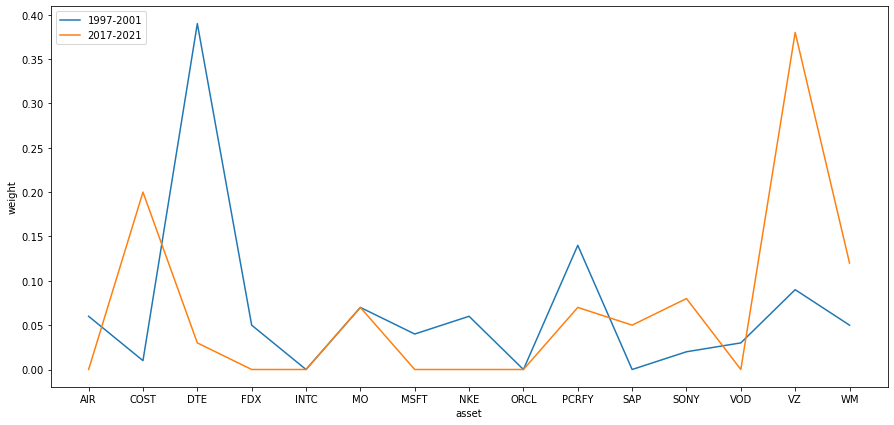

In [34]:
# Min Varinaz
plt.figure(figsize=(15,7))
plt.plot(insample_weights.iloc[0].T, label='1997-2001')
plt.plot(outsample_weights.iloc[0].T, label='2017-2021')
plt.xlabel('asset')
plt.ylabel('weight')
plt.legend();

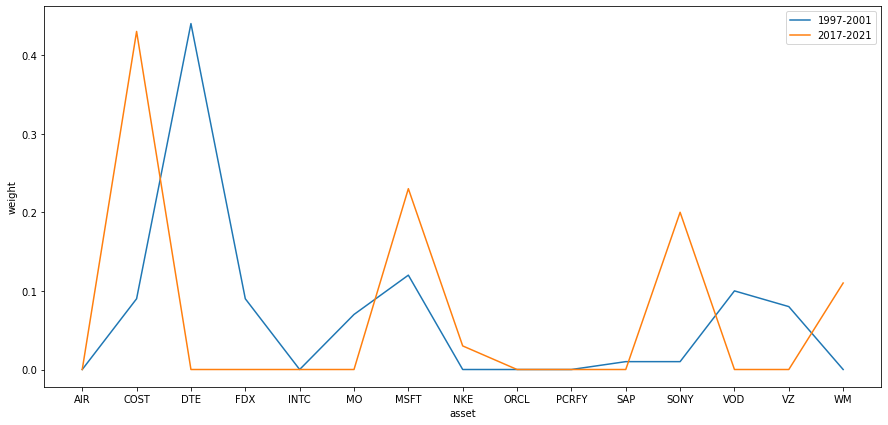

In [35]:
# Min Value at Risk
plt.figure(figsize=(15,7))
plt.plot(insample_weights.iloc[1].T, label='1997-2001')
plt.plot(outsample_weights.iloc[1].T, label='2017-2021')
plt.xlabel('asset')
plt.ylabel('weight')
plt.legend();

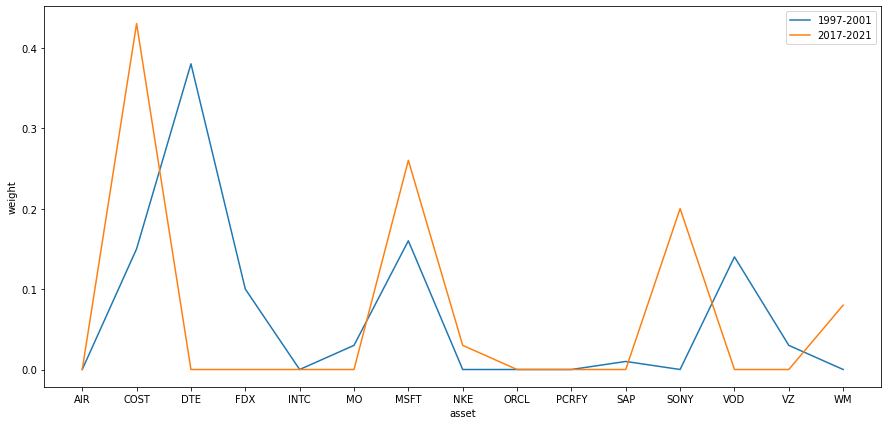

In [36]:
# Max Sharpe Ratio
plt.figure(figsize=(15,7))
plt.plot(insample_weights.iloc[2].T, label='1997-2001')
plt.plot(outsample_weights.iloc[2].T, label='2017-2021')
plt.xlabel('asset')
plt.ylabel('weight')
plt.legend();

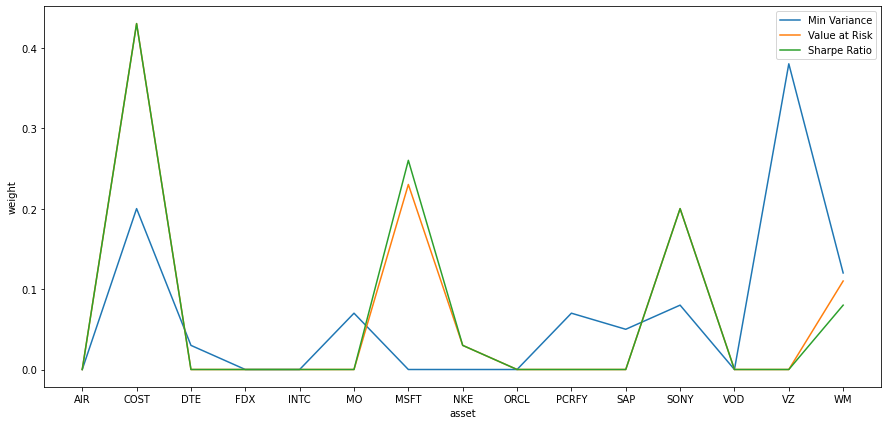

In [37]:
# 2017-2021
plt.figure(figsize=(15,7))
plt.plot(outsample_weights.iloc[0].T, label='Min Variance')
plt.plot(outsample_weights.iloc[1].T, label='Value at Risk')
plt.plot(outsample_weights.iloc[2].T, label='Sharpe Ratio')
plt.xlabel('asset')
plt.ylabel('weight')
plt.legend();

Veränderungen in den Gewichtungen je Strategie: ...

# 6 Verbesserungsmöglichkeiten der Strategien

Aufgabenstellung: Wie würden Sie die Implementierung Ihrer Portfoliostrategie noch verbessern? Was 
könnten Sie noch beachten?

- verschiedene Asset-Klassen (Assets mit minimaler Covarianz - am besten Null)
- Aus 30 Assets die 15 mit den geringsten Covarianzen auswählen
- anderes alpha-Quantil bei min VaR-Strategie
- Benchmark einführen (z.B. S&P500) - Gleichgewichtetes Portfolio bereits als Benchmark
- Semivarianz bzw. Downside-Risk anstelle der Standardabweichung (evtl hier ausführen)
- Sortino-Ratio anstelle Sharpe 
Ratio (evtl hier ausführen)
- Für kurze Prognosehorizonte Mean Reversion (evtl hier ausführen) oder für lange Prognosehorizonte Moving Average
  Crossover (Master-Aufgabe) anstelle einer Buy-and-Hold-Strategie
- Rebalancing der Portfoliogewichte
- 𝜇 und 𝜎 nicht auf Basis historischer Daten schätzen

Vereinfachende Annahmen
- Risikolosen Zins beachten
- keine Standardnormalverteilung bei Value at Risk

# MA-Alternative 1:
# 7.1 Momentum-Strategie

Aufgabenstellung MA-Alternative 1: Entwickeln Sie für Ihre 15 Aktien eine Momentum Strategie auf Monatsebene. Diese ist wie folgt aufgebaut: Sie investieren in das Terzil der Unternehmen mit der 
höchsten Rendite des Vormonats. Diese 5 Unternehmen halten Sie bis zum Ende des darauffolgenden Monats. Zum Monatsende erfolgt somit immer eine Portfolioumschichtung, wobei die 
Unternehmen mit der höchsten Rendite im vergangen Monat gekauft werden. Funktioniert 
diese Strategie? Beurteilen Sie die Performance.

In [38]:
# Frequency im Zeitindex auf 'Businessdays' festlegen
Adj_Close = Adj_Close.asfreq('B')
returns = returns.asfreq('B')

In [39]:
# Max Return optimales Portfolio des Terzils mit der höchsten Rendite im Vormonat berechnen
# Funktion 1
def calc_neg_return(weights, mean_returns):
    portfolio_return = np.sum(weights * mean_returns) * 252
    return -portfolio_return

# Funktion 2
def max_return(mean_returns):
    num_assets = len(mean_returns)
    args = (mean_returns)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) -1})
    bound = (0.0, 1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_neg_return, num_assets*[1/num_assets], args=args, 
                          method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

# Ausführen der Funktionen
#function_result = max_return(insample_mean_returns)
#function_result

In [40]:
monthly_returns = returns.resample('M').sum()
str(monthly_returns.index.tolist()[0])[0:10]

'1997-01-31'

In [41]:
current_month_returns = np.array(monthly_returns.iloc[0])
print(np.sort(current_month_returns))
sort_index = np.argsort(current_month_returns)
sort_index
locations = sort_index[-5:].tolist()
locations
tickers_top5 = [tickers[i] for i in locations]

[-0.11294746 -0.0870117  -0.07731879 -0.07693366 -0.03522862  0.01479908
  0.03204808  0.06404714  0.06608985  0.08829276  0.13693287  0.16108547
  0.16736555  0.21905464  0.22283709]


In [42]:
monthly_top5_cov = returns[tickers_top5]#.iloc[1,]
monthly_top5_cov

,NKE,FDX,WM,INTC,MSFT
Date,,,,,
1997-01-03,0.014569,0.019859,-0.024591,0.059553,0.036094
1997-01-06,0.004123,-0.019859,-0.012526,0.003607,-0.002958
1997-01-07,-0.014508,-0.002870,0.049190,0.031889,0.007380
1997-01-08,-0.006283,-0.020320,0.027615,-0.007877,-0.019303
1997-01-09,0.018731,0.028904,-0.015687,0.005258,-0.012067
...,...,...,...,...,...
2021-12-24,NaN,NaN,NaN,NaN,NaN
2021-12-27,0.011463,0.009528,0.011359,0.012203,0.022921
2021-12-28,-0.006946,0.000741,0.008209,-0.003472,-0.003510


In [43]:
monthly_top5_returns = returns[tickers_top5]
monthly_top5_returns.loc['1997-01-03':str(monthly_returns.index.tolist()[0])[0:10]].cov()

,NKE,FDX,WM,INTC,MSFT
NKE,0.000306,0.000168,-0.000059,0.000060,0.000135
FDX,0.000168,0.000341,-0.000092,0.000110,0.000137
WM,-0.000059,-0.000092,0.000538,-0.000082,-0.000148
INTC,0.000060,0.000110,-0.000082,0.000370,0.000225
MSFT,0.000135,0.000137,-0.000148,0.000225,0.000406


In [44]:
monthly_top5_mean_returns = returns[tickers_top5].resample('M').mean().iloc[0]
monthly_top5_mean_returns.cov

<bound method Series.cov of NKE     0.006521
FDX     0.007671
WM      0.007970
INTC    0.010431
MSFT    0.010611
Name: 1997-01-31 00:00:00, dtype: float64>

In [ ]:
current_month_returns = np.array(monthly_returns.iloc[0])
sort_index = np.argsort(current_month_returns)
locations = sort_index[-5:].tolist()
tickers_top5 = [tickers[i] for i in locations]
monthly_top5_mean_returns = monthly_returns[tickers_top5]

weights_top5 = max_return(monthly_top5_mean_returns)

weights = np.zeros(len(tickers))
weights[locations] = weights_top5
empty_list.append(weights)

In [51]:
monthly_returns = returns.resample('M').sum()
np.sum(np.sum(monthly_returns))
monthly_returns

,AIR,COST,DTE,FDX,INTC,MO,MSFT,NKE,ORCL,PCRFY,SAP,SONY,VOD,VZ,WM
Date,,,,,,,,,,,,,,,
1997-01-31,-0.112947,0.088293,-0.035229,0.161085,0.219055,0.064047,0.222837,0.136933,-0.077319,-0.087012,-0.076934,0.032048,0.066090,0.014799,0.167366
1997-02-28,-0.019418,-0.038282,-0.036515,0.004866,-0.134192,0.129052,-0.045121,0.049921,0.009600,0.035556,0.180118,0.071587,0.099530,0.027499,-0.013794
1997-03-31,0.162519,0.075153,-0.100064,0.012062,-0.019574,-0.161097,-0.061466,-0.149050,-0.017671,0.018687,0.102415,-0.042410,-0.073703,-0.129149,-0.013986
1997-04-30,-0.004310,0.044254,-0.004662,0.035340,0.096224,0.034449,0.281528,-0.095310,0.030329,0.035367,0.084796,0.059667,0.002829,0.121188,-0.080630
1997-05-31,0.041159,0.156004,-0.004684,-0.030555,-0.010669,0.111059,0.020368,0.021978,0.159527,0.160200,0.000000,0.150005,0.008439,0.032671,0.101536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,-0.054891,0.058240,0.025416,-0.052281,0.012787,0.044579,0.059769,-0.015026,0.022580,-0.010775,0.043701,-0.008086,0.044319,-0.014082,0.045167
2021-09-30,-0.042855,-0.013572,-0.067372,-0.189111,-0.014534,-0.080326,-0.068406,-0.126050,-0.022695,0.035206,-0.105997,0.066554,-0.099714,-0.018164,-0.034079
2021-10-31,0.086780,0.091358,0.014574,0.071443,-0.083741,-0.031465,0.162366,0.141410,0.099794,-0.001610,0.069644,0.046039,-0.032898,-0.007260,0.070251


In [48]:
monthly_returns.iloc[0].nlargest(5)
#np.array(monthly_returns.iloc[0].nlargest(5))

MSFT    0.222837
INTC    0.219055
WM      0.167366
FDX     0.161085
NKE     0.136933
Name: 1997-01-31 00:00:00, dtype: float64

In [ ]:
# Monatliche Logreturns berechnen
monthly_returns = returns.resample('M').sum()

def monthly_weights(monthly_returns):
    empty_list = list()
    for i in range(len(monthly_returns)):
        
        current_month_returns = np.array(monthly_returns.iloc[0])
        sort_index = np.argsort(current_month_returns)
        locations = sort_index[-5:].tolist()
        x = np.zeros(len(tickers))
        x[:] = np.nan
        x[locations] = 1
        current_month_returns * x
        
        
        
        monthly_top5_returns = [monthly_returns.iloc[i].idxmax(5)
        #monthly_top5_tickers = tickers[monthly_top5_returns]
        monthly_top5_mean_returns = [returns * x]
        # Max Return Portfolio Funktion ausführen
        w = max_return(monthly_top5_mean_returns)
        empty_list.append(w)

# Oberes Terzil der 15 Aktien pro Monat herausfiltern
monthly_returns.sort(axis=1) for i in range(len(monthly_returns))

In [ ]:
# Tägliche Gewichte berechnen
np.zeros(len(tickers)) #min 5 Aktien immer mit 0 gewichtet und Max Return opt. Portfolio auf oberes Terzil der beiden vergangenen Monate


# Optimale Gewichte in täglichen Gewichtsvektor eintragen

- Strategie basiert auf Max der Rendite, hohes Risiko
- Brutto Renditen, monatliches Traden

# MA-Alternative 2: 
# 7.2 Short-Selling

Aufgabenstellung MA-Alternative 2: Erlauben Sie nun bei der Festlegung der Gewichte im Zeitraum 1997-2001 
auch Short-Selling. Wie beurteilen Sie die Performance der Portfolios für den Zeitraum von 
2002-2021. Ist Short-Selling in diesem Zusammenhang und über solch einen Zeitraum sinnvoll?

In [ ]:
# Parameter wie in Kapiel 1
insample_cov = insample.cov()
insample_mean_returns = insample.mean()
alpha = 0.05
days = 252
rf = 0

In [ ]:
#insample_cov

**7.2.1 Bestimmung des Portfolios mit minimaler Varianz**

In [ ]:
# Funktion 1
def calc_portfolio_std(weights, cov):
    portfolio_std = np.sqrt(np.dot(np.dot(weights.T, cov), weights)) * np.sqrt(252) #h=15x1 Matrix-> [h.transpose * cov] * h = [1x15 * 15x15] * 15x1 = 1x15 * 15x1 = 1x1
    return portfolio_std

# Funktion 2
def min_variance(cov):
    num_assets = len(cov)
    args = cov
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) #Nebenbedingung; ; eq für equality -> Gleichung != 0; np.sum(weights) - 1 = 0 (Summe der Gewichte müssen 1 ergeben und Gleichung muss gleich Null sein!)
    bound = (-1.0, 1.0)
    bounds = tuple(bound for assets in range(num_assets))
    result = sco.minimize(calc_portfolio_std, num_assets*[1/num_assets], args=args, 
                         method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# Ausführen der Funktionen
function_result = min_variance(insample_cov) #fun: gibt den ZF-wert (Min Varinaz) an & x: gibt die Gewichtungen der einzelnen Aktien im Portfolio an
#function_result#['x']

In [ ]:
# Ergebnisse der Optimierung in DataFrame abspeichern
insample_min_port_variance_shortselling = pd.DataFrame([round(x,2) for x in function_result['x']], index=tickers).T
insample_min_port_variance_shortselling['Function Result'] = function_result['fun']

**7.2.2 Bestimmung des Portfolios mit minimalem Value at Risk (VaR)**

In [ ]:
# Funktion 1
def calc_portfolio_VaR(weights, mean_returns, cov, alpha, days):
    portfolio_return = np.sum(weights * mean_returns) * days #nur bei Logrenditen Addition möglich
    portfolio_std = np.sqrt(np.dot(np.dot(weights.T, cov), weights)) * np.sqrt(days)
    portfolio_VaR = abs(portfolio_return - (portfolio_std * stats.norm.ppf(1 - alpha))) #Erklären
    return portfolio_VaR

# Funktion 2
def min_VaR(mean_returns, cov, alpha, days):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, alpha ,days)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (-1.0, 1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_portfolio_VaR, num_assets*[1/num_assets], args=args, 
                         method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# Ausführen der Funktionen
function_result = min_VaR(insample_mean_returns, insample_cov, alpha, days)
#function_result

In [ ]:
# Ergebnisse der Optimierung in DataFrame abspeichern
insample_min_port_VaR_shortselling = pd.DataFrame([round(x,2) for x in function_result['x']], index=tickers).T
insample_min_port_VaR_shortselling['Function Result'] = function_result['fun']

**7.2.3 Bestimmung des Portfolios mit maximaler Sharpe Ratio (𝜇 - 𝜎 effizientes Portfolio)**

In [ ]:
# Funktion 1
def calc_neg_sharpe(weights, mean_returns, cov, rf):
    portfolio_return = np.sum(weights * mean_returns) * 252
    portfolio_std = np.sqrt(np.dot(np.dot(weights.T, cov), weights)) * np.sqrt(252)
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return -sharpe_ratio

# Funktion 2
def max_sharpe_ratio(mean_returns, cov, rf):
    num_assets = len(mean_returns)
    args = (mean_returns, cov, rf)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) -1})
    bound = (-1.0, 1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(calc_neg_sharpe, num_assets*[1/num_assets], args=args, 
                          method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# Ausführen der Funktionen
function_result = max_sharpe_ratio(insample_mean_returns, insample_cov, rf)
#function_result

In [ ]:
# Ergebnisse der Optimierung in DataFrame abspeichern
insample_max_port_SharpeRatio_shortselling = pd.DataFrame([round(x,2) for x in function_result['x']], index=tickers).T
insample_max_port_SharpeRatio_shortselling['Function Result'] = -function_result['fun'] #hier Vorzeichen wieder umkehren!

**7.2.4 Vergleich der Gewichtungen der drei Strategien**

In [ ]:
# Zusammenfassung der Portfolios in einem DataFrame
insample_portfolios_shortselling = pd.concat([insample_min_port_variance_shortselling, insample_min_port_VaR_shortselling, insample_max_port_SharpeRatio_shortselling], axis=0)
insample_portfolios_shortselling.index = ['Min Variance', 'Min VaR', 'Max Sharpe Ratio']
insample_portfolios_shortselling

In [ ]:
# Dataframe nur mit Gewichtungen der Aktien
insample_weights_shortselling = insample_portfolios_shortselling.drop(['Function Result'], axis=1)

In [ ]:
# 1997-2001
plt.figure(figsize=(15,7))
plt.plot(insample_weights_shortselling.iloc[0].T, label='Min Variance')
plt.plot(insample_weights_shortselling.iloc[1].T, label='Value at Risk')
plt.plot(insample_weights_shortselling.iloc[2].T, label='Sharpe Ratio')
plt.xlabel('asset')
plt.ylabel('weight')
plt.legend();

bla bla bla...

**7.2.5 Bewertung der Performance der drei Strategien gegenüber Aufgabe 1 (ohne Short-Selling)**

In [ ]:
# Returns der Strategien berechnen
BaH_returns_shortselling = pd.DataFrame(columns = ['Min Variance', 'Min VaR', 'Max Sharpe Ratio'], index=['Returns'])
BaH_returns_shortselling.loc['Returns'] = [np.sum(outsample_cumulated.iloc[-1] * insample_weights_shortselling.iloc[i]) for i in range(len(insample_weights_shortselling))]
BaH_returns_shortselling - BaH_returns

Verbesserung/Verschlechterung der Returns in der BaH-Strategie...

**7.2.6 Short-Selling über diesen Zeitraum sinnvoll?**

...